In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pyparsing import countedArray
from sympy.ntheory import dra

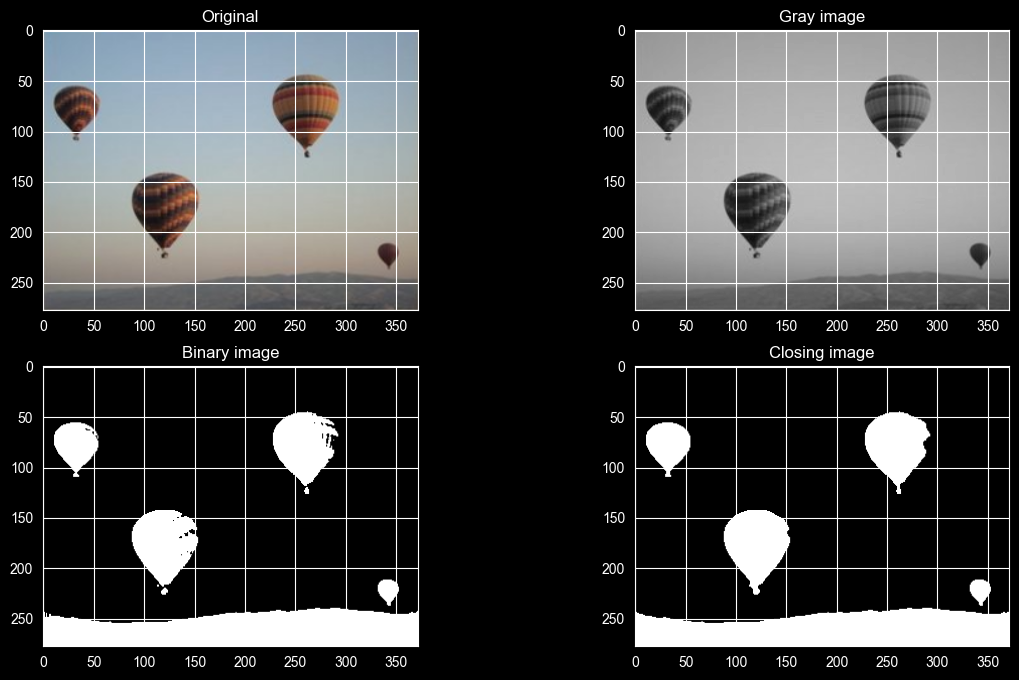

In [17]:
input_image = cv.imread("../../../class.vision/images/balloon.png")

# convert image to grayscale
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

# invert black and white
_, binary_image = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)
closing = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7), (3, 3)))

plt.figure(figsize=[14,8])
plt.subplot(221);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(222);plt.imshow(gray_image, vmax=255, vmin=0, cmap='gray');plt.title("Gray image");
plt.subplot(223);plt.imshow(binary_image, vmax=255, vmin=0, cmap='gray');plt.title("Binary image");
plt.subplot(224);plt.imshow(closing, vmax=255, vmin=0, cmap='gray');plt.title("Closing image");

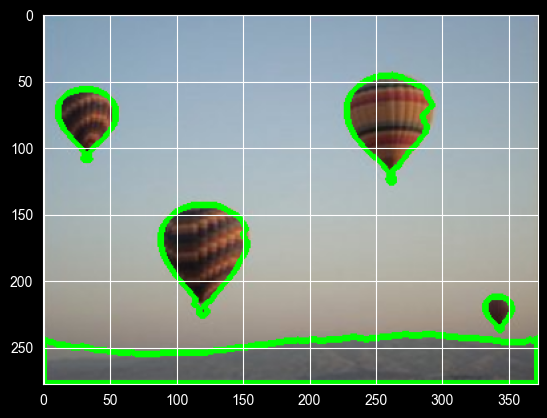

In [18]:
contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

draw_img = input_image.copy()
cv.drawContours(draw_img, contours, -1, (0,255,0), 3)
plt.imshow(draw_img[..., ::-1])

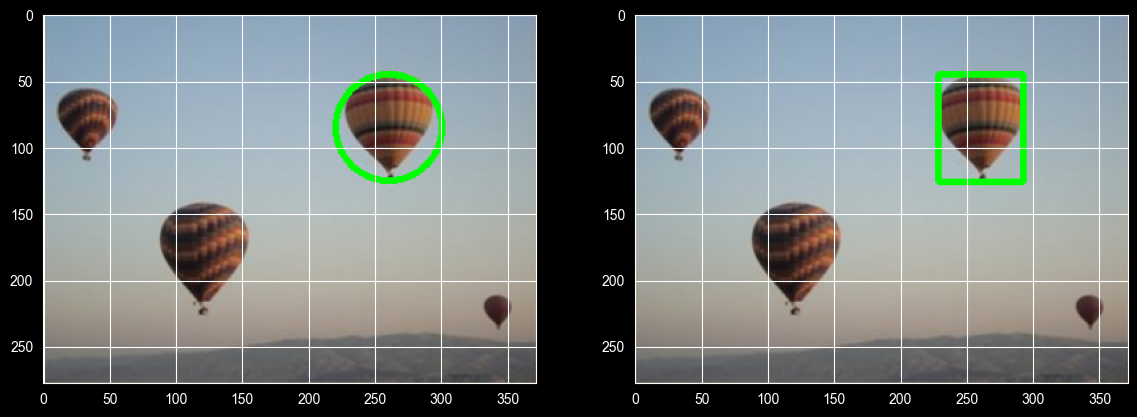

In [43]:
cidx = 4
bbox = cv.boundingRect(contours[cidx])
center, radius = cv.minEnclosingCircle(contours[cidx])

center = (int(center[0]), int(center[1]))
radius = int(radius)

bbox_drawing_img = input_image.copy()
circle_drawing_img = input_image.copy()


cv.circle(circle_drawing_img, center, radius, (0,255,0), 3)
cv.rectangle(bbox_drawing_img, bbox, (0,255,0), 3)

plt.figure(figsize=[14,8])
plt.subplot(121);plt.imshow(circle_drawing_img[...,::-1])
plt.subplot(122);plt.imshow(bbox_drawing_img[...,::-1])

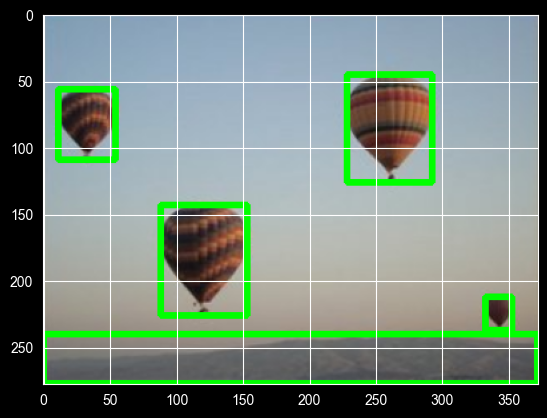

In [44]:
bbox_drawing_img = input_image.copy()

for contour in contours:
    bbox = cv.boundingRect(contour)
    cv.rectangle(bbox_drawing_img, bbox, (0,255,0), 3)

plt.imshow(bbox_drawing_img[...,::-1])